In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
plt.style.use('seaborn-pastel')
sns.set_palette('Paired')

In [3]:
baseline_200 = pd.read_csv('./input/output_results_200_baseline.csv')
exp_100x2 = pd.read_csv('./input/output_results_100x2.csv')
exp_50x4 = pd.read_csv('./input/output_results_50x4.csv')
exp_20x10 = pd.read_csv('./projects/security_20x10/analytics/modeling_metrics.csv')
baseline_500 = pd.read_csv('./input/output_results_500_baseline.csv')
exp_100x5 = pd.read_csv('./input/output_results_100x5.csv')
exp_250x2 = pd.read_csv('./input/output_results_250x2.csv')

In [4]:
# add train volume to the dfs
baseline_200['train_size'] = baseline_200.round_id * 200
exp_100x2['train_size'] = exp_100x2.round_id * 100
exp_50x4['train_size'] = exp_50x4.round_id * 50

In [5]:
exp_20x10

,round_id,tag_name,train_roc_auc,train_f1,train_precision,train_recall,train_cr,train_pos_rate,test_roc_auc,test_f1,test_precision,test_recall,test_cr,test_pos_rate
0,1,lock,1.000000,0.968750,0.800000,1.000000,precision recall f1-score ...,0.200,0.637665,0.689965,0.377119,0.517442,precision recall f1-score ...,0.138598
1,1,video_doorbell,0.972222,0.750000,1.000000,0.500000,precision recall f1-score ...,0.100,0.660270,0.519551,0.171642,0.141975,precision recall f1-score ...,0.130540
2,1,lights,0.960784,0.833333,1.000000,0.666667,precision recall f1-score ...,0.150,0.751324,0.654315,0.182353,0.427586,precision recall f1-score ...,0.058421
3,1,security_screen_door,0.944444,0.750000,1.000000,0.500000,precision recall f1-score ...,0.100,0.582656,0.547075,0.352941,0.103448,precision recall f1-score ...,0.046737
4,1,security_camera_system,0.972222,0.750000,1.000000,0.500000,precision recall f1-score ...,0.100,0.542748,0.598229,0.258621,0.214286,precision recall f1-score ...,0.028203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,10,guard_ID_resident,0.871993,0.711340,0.050847,1.000000,precision recall f1-score ...,0.030,0.730441,0.653583,0.068852,0.823529,precision recall f1-score ...,0.044309
93,10,security_screen_door,1.000000,1.000000,1.000000,1.000000,precision recall f1-score ...,0.080,0.774167,0.733832,0.636364,0.480392,precision recall f1-score ...,0.044309
94,10,warning_sign,0.999418,0.975138,0.678571,1.000000,precision recall f1-score ...,0.095,0.806269,0.833154,0.593985,0.718182,precision recall f1-score ...,0.095569
95,10,security_camera_system,0.998974,0.997436,0.833333,1.000000,precision recall f1-score ...,0.025,0.545461,0.530235,0.084507,0.089552,precision recall f1-score ...,0.029105


In [6]:
exp_20x10.groupby('tag_name').agg({'train_pos_rate': 'min'})

,train_pos_rate
tag_name,
dog,0.014286
gate,0.110000
guard_ID_resident,0.025000
intercom,0.016667
lights,0.070000
lock,0.116667
none,0.033333
security_camera_system,0.018750
security_screen_door,0.075000


In [7]:
def plot_score_by_tag(score_df, yaxis, title, tag_col='tag_name', xaxis='round_id', ylim=(0.2, 1)):
    plt.figure(figsize=(10, 8))
    score_df = score_df.loc[score_df[tag_col] != 'security_camera_system', :].reset_index(drop=True)
    for tag_name in score_df[tag_col].unique():
        plot_df = score_df.loc[score_df[tag_col] == tag_name, :]
        plt.plot(xaxis, yaxis, data=plot_df, label=tag_name, marker='*')
    #plt.ylim(0.3, 1)
    xticks = [i+1 for i in list(range(score_df[xaxis].max()))]
    plt.xticks(xticks)
    plt.xlabel(xaxis.upper())
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.ylim(ylim)
    plt.show()
    plt.close()

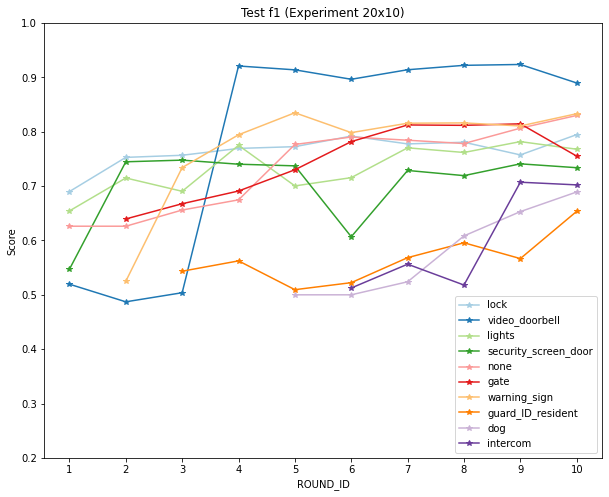

In [15]:
plot_score_by_tag(exp_20x10, 'test_f1', 'Test f1 (Experiment 20x10)')

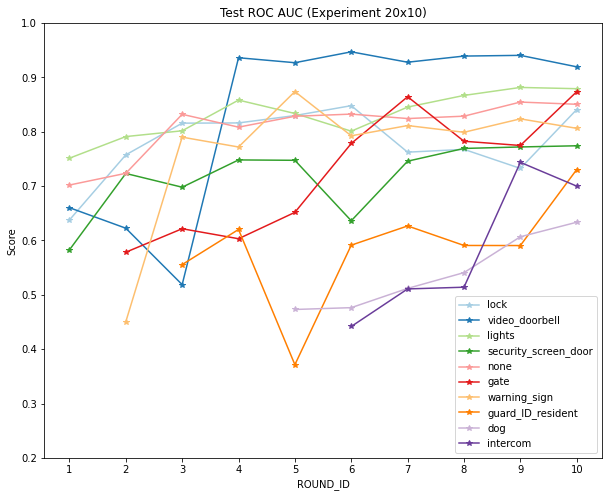

In [16]:
plot_score_by_tag(exp_20x10, 'test_roc_auc', 'Test ROC AUC (Experiment 20x10)')

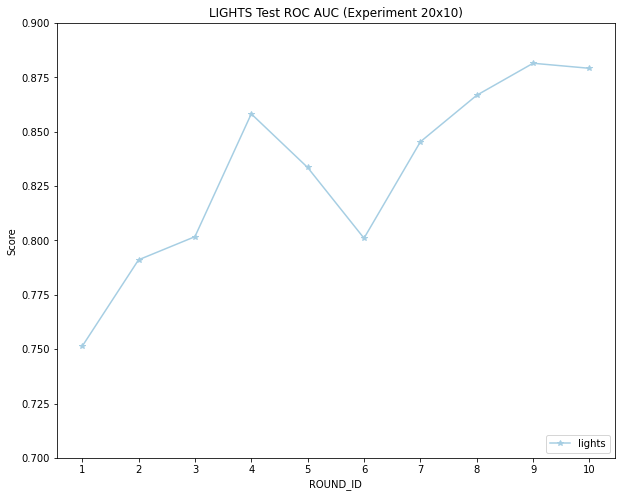

In [17]:
plot_score_by_tag(exp_20x10.loc[exp_20x10.tag_name == 'lights'], 'test_roc_auc', 'LIGHTS Test ROC AUC (Experiment 20x10)', ylim=(0.7, 0.9))

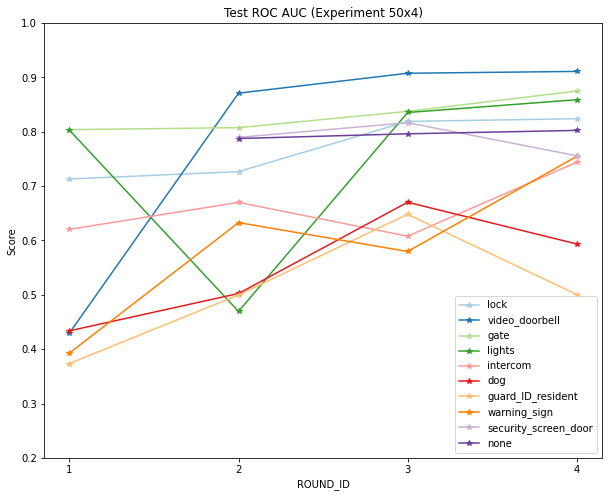

In [20]:
plot_score_by_tag(exp_50x4, 'test_roc_auc', 'Test ROC AUC (Experiment 50x4)')

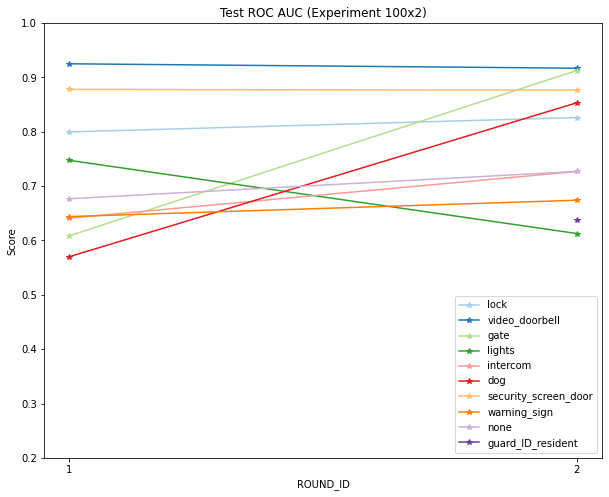

In [21]:
plot_score_by_tag(exp_100x2, 'test_roc_auc', 'Test ROC AUC (Experiment 100x2)')

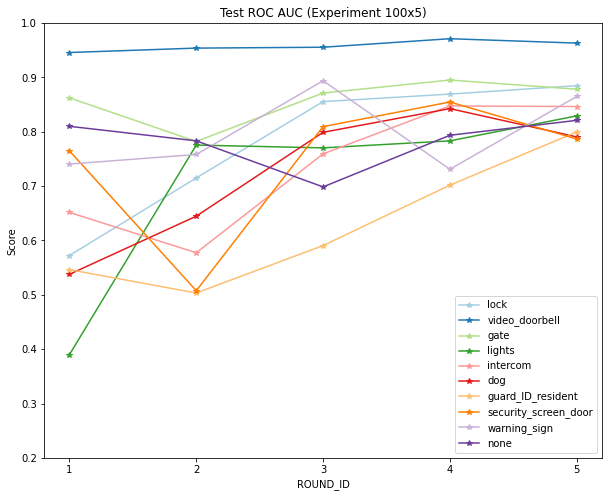

In [22]:
plot_score_by_tag(exp_100x5, 'test_roc_auc', 'Test ROC AUC (Experiment 100x5)')

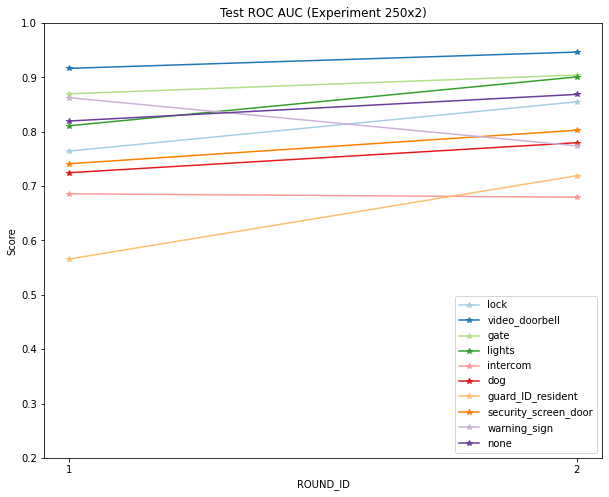

In [23]:
plot_score_by_tag(exp_250x2, 'test_roc_auc', 'Test ROC AUC (Experiment 250x2)')